# Titanic Survival Prediction - Complete ML Pipeline

## Comprehensive Pipeline:

1. **Load Data** - From EDA folder (train_clean.csv, test_clean.csv)
2. **Baseline Training** - 3 models with detailed logging
3. **Hyperparameter Tuning** - GridSearchCV with logging
4. **Visualization** - Before/After comparison charts
5. **Results Summary** - Comprehensive CSV output

## Models:

- Logistic Regression
- Decision Tree
- K-Nearest Neighbors (KNN)

## Output:

- `logs/training_log.txt` - Baseline training details
- `logs/tuning_log.txt` - Tuning details
- `logs/training_summary.csv` - Baseline metrics
- `logs/tuning_summary.csv` - Tuning results
- `logs/comprehensive_results.csv` - All results
- `logs/plots/` - Comparison charts


In [ ]:
import numpy as np
import pandas as pd
import joblib
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

import os
import logging
import time
from datetime import datetime

#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Khai báo thư viện cho mô hình phân loại đa lớp
from sklearn.linear_model import LogisticRegression# Mô hình tuyến tính
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis# Phân tích tuyến tính
from sklearn.tree import DecisionTreeClassifier# Cây quyết định
from sklearn.neighbors import KNeighborsClassifier# Mô hình khoảng cách (k-láng giềng)
from sklearn.svm import SVC# Mô hình SVM (máy vector hỗ trợ)
from sklearn.naive_bayes import GaussianNB# Mô hình xác suất
from sklearn.neural_network import MLPClassifier# Mạng nơ-ron đơn giản (đa lớp)
from sklearn.ensemble import RandomForestClassifier#rừng ngẫu nhiên
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

In [10]:
save_dir = "Data_clean"
data = np.load(f'{save_dir}/model_data.npz')

X_train_loaded = data['X_train']
X_validation_loaded = data['X_validation']
y_train_loaded = data['y_train']
y_validation_loaded = data['y_validation']

# Kiểm tra kích thước (shape)
print(f"Shape của X_train: {X_train_loaded.shape}")
print(f"Shape của y_train: {y_train_loaded.shape}")
print(f"Shape của X_validation: {X_validation_loaded.shape}")
print(f"Shape của y_validation: {y_validation_loaded.shape}")

train_cleaned = pd.read_csv(f'{save_dir}/train_cleaned.csv')
display.display(train_cleaned.head(5))

imputer = joblib.load(f'{save_dir}/imputer.joblib')


Shape của X_train: (712, 17)
Shape của y_train: (712,)
Shape của X_validation: (179, 17)
Shape của y_validation: (179,)


,Pclass,Age,SibSp,Parch,Fare,HasCabin,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Survived
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
# Setup directories
os.makedirs("logs/plots", exist_ok=True)

# Set seed for reproducibility
np.random.seed(42)

print("All imports successful!")


All imports successful!


## Step 1: Load Data from EDA


In [ ]:
# Cell 2: Load data
print("Loading data from EDA folder...")

df_train = pd.read_csv("../Data_clean/train_cleaned.csv")
df_test = pd.read_csv("../Data_clean/test_cleaned.csv")

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")
print(f"\nTrain columns: {list(df_train.columns)[:5]}...")
print(f"Target distribution:\n{df_train['Survived'].value_counts()}")

# Prepare data
X_train_full = df_train.drop(columns=["Survived"])
y_train_full = df_train["Survived"]
X_test = df_test.drop(columns=["PassengerId"])

# Split train into train/validation (stratified 80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"\nAfter split and scaling:")
print(f"X_train: {X_train_scaled.shape}")
print(f"X_val: {X_val_scaled.shape}")
print(f"X_test: {X_test_scaled.shape}")


Loading data from EDA folder...


FileNotFoundError: [Errno 2] No such file or directory: '../Data_clean/test_cleaned.csv'

## Step 2: Setup Logging


In [9]:
# Cell 3: Setup logging functions
def setup_logger(name, log_file):
    """Create logger with file and console handlers."""
    logger = logging.getLogger(name)
    logger.setLevel(logging.DEBUG)
    logger.handlers.clear()

    file_handler = logging.FileHandler(log_file, mode="w")
    file_handler.setLevel(logging.DEBUG)

    console_handler = logging.StreamHandler()
    console_handler.setLevel(logging.INFO)

    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s - %(message)s", datefmt="%Y-%m-%d %H:%M:%S"
    )
    file_handler.setFormatter(formatter)
    console_handler.setFormatter(formatter)

    logger.addHandler(file_handler)
    logger.addHandler(console_handler)

    return logger


train_logger = setup_logger("training", "logs/training_log.txt")
tune_logger = setup_logger("tuning", "logs/tuning_log.txt")

print("Loggers setup complete!")


Loggers setup complete!


## Step 3: Baseline Model Training


In [10]:
# Cell 4: Train baseline models
train_logger.info(f"\n{'#'*60}")
train_logger.info("BASELINE MODEL TRAINING")
train_logger.info(f"{'#'*60}")
train_logger.info(f"Start time: {datetime.now().isoformat()}")
train_logger.info(f"Train set size: {X_train_scaled.shape}")
train_logger.info(f"Validation set size: {X_val_scaled.shape}")

baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

baseline_results = []

for model_name, model in baseline_models.items():
    train_logger.info(f"\n{'='*60}")
    train_logger.info(f"Training: {model_name}")
    train_logger.info(f"{'='*60}")

    start_time = time.time()
    train_logger.info(f"Start: {datetime.now().isoformat()}")

    model.fit(X_train_scaled, y_train)

    train_time = time.time() - start_time
    train_logger.info(f"Training time: {train_time:.4f}s")

    y_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, zero_division=0)
    rec = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    cm = confusion_matrix(y_val, y_pred)

    train_logger.info(f"\nValidation Metrics (Baseline):")
    train_logger.info(f"  Accuracy:  {acc:.4f}")
    train_logger.info(f"  Precision: {prec:.4f}")
    train_logger.info(f"  Recall:    {rec:.4f}")
    train_logger.info(f"  F1-Score:  {f1:.4f}")
    train_logger.info(f"\nConfusion Matrix:\n{cm}")
    train_logger.info(
        f"\nClassification Report:\n{classification_report(y_val, y_pred)}"
    )

    baseline_results.append(
        {
            "model_name": model_name,
            "model": model,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "train_time": train_time,
        }
    )

    print(f"✓ {model_name}: Acc={acc:.4f}, F1={f1:.4f}")

train_logger.info(f"\n{'#'*60}")
train_logger.info(f"Training completed at {datetime.now().isoformat()}")
train_logger.info(f"{'#'*60}\n")

df_baseline = pd.DataFrame(
    [
        {
            "Model": r["model_name"],
            "Stage": "Baseline",
            "Accuracy": r["accuracy"],
            "Precision": r["precision"],
            "Recall": r["recall"],
            "F1-Score": r["f1"],
        }
        for r in baseline_results
    ]
)
df_baseline.to_csv("logs/training_summary.csv", index=False)

print("\nBaseline Results:")
print(df_baseline.to_string(index=False))


2025-10-29 07:18:40 - INFO - 
############################################################
2025-10-29 07:18:40 - INFO - BASELINE MODEL TRAINING
2025-10-29 07:18:40 - INFO - ############################################################
2025-10-29 07:18:41 - INFO - Start time: 2025-10-29T07:18:41.000004
2025-10-29 07:18:41 - INFO - Train set size: (712, 18)
2025-10-29 07:18:41 - INFO - Validation set size: (179, 18)
2025-10-29 07:18:41 - INFO - 
2025-10-29 07:18:41 - INFO - Training: Logistic Regression
2025-10-29 07:18:41 - INFO - ============================================================
2025-10-29 07:18:41 - INFO - Start: 2025-10-29T07:18:41.003129
2025-10-29 07:18:41 - INFO - Training time: 0.0046s
2025-10-29 07:18:40 - INFO - BASELINE MODEL TRAINING
2025-10-29 07:18:40 - INFO - ############################################################
2025-10-29 07:18:41 - INFO - Start time: 2025-10-29T07:18:41.000004
2025-10-29 07:18:41 - INFO - Train set size: (712, 18)
2025-10-29 07:18:41 - I

✓ Logistic Regression: Acc=0.7989, F1=0.7231
✓ Decision Tree: Acc=0.7933, F1=0.7176
✓ K-Nearest Neighbors: Acc=0.7933, F1=0.7218

Baseline Results:
              Model    Stage  Accuracy  Precision   Recall  F1-Score
Logistic Regression Baseline  0.798883   0.770492 0.681159  0.723077
      Decision Tree Baseline  0.793296   0.758065 0.681159  0.717557
K-Nearest Neighbors Baseline  0.793296   0.750000 0.695652  0.721805


## Step 4: Hyperparameter Tuning


In [11]:
# Cell 5: Tune all models
tune_logger.info(f"\n{'#'*60}")
tune_logger.info("HYPERPARAMETER TUNING PHASE")
tune_logger.info(f"{'#'*60}")
tune_logger.info(f"Start: {datetime.now().isoformat()}\n")

tuned_results = []

# 1. Logistic Regression
tune_logger.info(f"{'='*60}")
tune_logger.info("Tuning: Logistic Regression")
tune_logger.info(f"{'='*60}")

lr_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [1000, 2000],
}

start_time = time.time()
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_params,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=0,
)
lr_grid.fit(X_train_scaled, y_train)
tune_time = time.time() - start_time

lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_val_scaled)
lr_acc = accuracy_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred, zero_division=0)

tune_logger.info(f"Best params: {lr_grid.best_params_}")
tune_logger.info(f"Best CV F1: {lr_grid.best_score_:.4f}")
tune_logger.info(f"Val Accuracy: {lr_acc:.4f}, F1: {lr_f1:.4f}")
tune_logger.info(f"Tuning time: {tune_time:.4f}s\n")

tuned_results.append(
    {
        "model_name": "Logistic Regression",
        "model": lr_best,
        "best_params": lr_grid.best_params_,
        "best_cv_score": lr_grid.best_score_,
        "accuracy": lr_acc,
        "precision": precision_score(y_val, lr_pred, zero_division=0),
        "recall": recall_score(y_val, lr_pred, zero_division=0),
        "f1": lr_f1,
        "tune_time": tune_time,
    }
)

print("✓ Logistic Regression tuned")


2025-10-29 07:18:41 - INFO - 
############################################################
2025-10-29 07:18:41 - INFO - HYPERPARAMETER TUNING PHASE
2025-10-29 07:18:41 - INFO - ############################################################
2025-10-29 07:18:41 - INFO - Start: 2025-10-29T07:18:41.061514

2025-10-29 07:18:41 - INFO - ============================================================
2025-10-29 07:18:41 - INFO - Tuning: Logistic Regression
2025-10-29 07:18:41 - INFO - ============================================================
2025-10-29 07:18:41 - INFO - HYPERPARAMETER TUNING PHASE
2025-10-29 07:18:41 - INFO - ############################################################
2025-10-29 07:18:41 - INFO - Start: 2025-10-29T07:18:41.061514

2025-10-29 07:18:41 - INFO - ============================================================
2025-10-29 07:18:41 - INFO - Tuning: Logistic Regression
2025-10-29 07:18:41 - INFO - ============================================================
2025-10-29 07

✓ Logistic Regression tuned


In [12]:
# Cell 6: Tune Decision Tree
tune_logger.info(f"{'='*60}")
tune_logger.info("Tuning: Decision Tree")
tune_logger.info(f"{'='*60}")

dt_params = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

start_time = time.time()
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=0,
)
dt_grid.fit(X_train_scaled, y_train)
tune_time = time.time() - start_time

dt_best = dt_grid.best_estimator_
dt_pred = dt_best.predict(X_val_scaled)
dt_acc = accuracy_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred, zero_division=0)

tune_logger.info(f"Best params: {dt_grid.best_params_}")
tune_logger.info(f"Best CV F1: {dt_grid.best_score_:.4f}")
tune_logger.info(f"Val Accuracy: {dt_acc:.4f}, F1: {dt_f1:.4f}")
tune_logger.info(f"Tuning time: {tune_time:.4f}s\n")

tuned_results.append(
    {
        "model_name": "Decision Tree",
        "model": dt_best,
        "best_params": dt_grid.best_params_,
        "best_cv_score": dt_grid.best_score_,
        "accuracy": dt_acc,
        "precision": precision_score(y_val, dt_pred, zero_division=0),
        "recall": recall_score(y_val, dt_pred, zero_division=0),
        "f1": dt_f1,
        "tune_time": tune_time,
    }
)

print("✓ Decision Tree tuned")


2025-10-29 07:18:44 - INFO - ============================================================
2025-10-29 07:18:44 - INFO - Tuning: Decision Tree
2025-10-29 07:18:44 - INFO - ============================================================
2025-10-29 07:18:44 - INFO - Tuning: Decision Tree
2025-10-29 07:18:44 - INFO - ============================================================
2025-10-29 07:18:44 - INFO - Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
2025-10-29 07:18:44 - INFO - Best CV F1: 0.7545
2025-10-29 07:18:44 - INFO - Val Accuracy: 0.8045, F1: 0.7200
2025-10-29 07:18:44 - INFO - Tuning time: 0.2933s

2025-10-29 07:18:44 - INFO - Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
2025-10-29 07:18:44 - INFO - Best CV F1: 0.7545
2025-10-29 07:18:44 - INFO - Val Accuracy: 0.8045, F1: 0.7200
2025-10-29 07:18:44 - INFO - Tuning time: 0.2933s



✓ Decision Tree tuned


In [13]:
# Cell 7: Tune KNN
tune_logger.info(f"{'='*60}")
tune_logger.info("Tuning: K-Nearest Neighbors")
tune_logger.info(f"{'='*60}")

knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

start_time = time.time()
knn_grid = GridSearchCV(
    KNeighborsClassifier(), knn_params, cv=5, scoring="f1", n_jobs=-1, verbose=0
)
knn_grid.fit(X_train_scaled, y_train)
tune_time = time.time() - start_time

knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_val_scaled)
knn_acc = accuracy_score(y_val, knn_pred)
knn_f1 = f1_score(y_val, knn_pred, zero_division=0)

tune_logger.info(f"Best params: {knn_grid.best_params_}")
tune_logger.info(f"Best CV F1: {knn_grid.best_score_:.4f}")
tune_logger.info(f"Val Accuracy: {knn_acc:.4f}, F1: {knn_f1:.4f}")
tune_logger.info(f"Tuning time: {tune_time:.4f}s\n")

tuned_results.append(
    {
        "model_name": "K-Nearest Neighbors",
        "model": knn_best,
        "best_params": knn_grid.best_params_,
        "best_cv_score": knn_grid.best_score_,
        "accuracy": knn_acc,
        "precision": precision_score(y_val, knn_pred, zero_division=0),
        "recall": recall_score(y_val, knn_pred, zero_division=0),
        "f1": knn_f1,
        "tune_time": tune_time,
    }
)

tune_logger.info(f"{'#'*60}")
tune_logger.info(f"Tuning completed at {datetime.now().isoformat()}")
tune_logger.info(f"{'#'*60}\n")

df_tuned = pd.DataFrame(
    [
        {
            "Model": r["model_name"],
            "Best CV F1": r["best_cv_score"],
            "Val Accuracy": r["accuracy"],
            "Val F1": r["f1"],
        }
        for r in tuned_results
    ]
)
df_tuned.to_csv("logs/tuning_summary.csv", index=False)

print("\nTuning Results:")
print(df_tuned.to_string(index=False))
print("\n✓ All models tuned")


2025-10-29 07:18:44 - INFO - ============================================================
2025-10-29 07:18:44 - INFO - Tuning: K-Nearest Neighbors
2025-10-29 07:18:44 - INFO - ============================================================
2025-10-29 07:18:44 - INFO - Tuning: K-Nearest Neighbors
2025-10-29 07:18:44 - INFO - ============================================================
2025-10-29 07:18:44 - INFO - Best params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
2025-10-29 07:18:44 - INFO - Best CV F1: 0.7469
2025-10-29 07:18:44 - INFO - Val Accuracy: 0.7654, F1: 0.6818
2025-10-29 07:18:44 - INFO - Tuning time: 0.1835s

2025-10-29 07:18:44 - INFO - ############################################################
2025-10-29 07:18:44 - INFO - Tuning completed at 2025-10-29T07:18:44.892384
2025-10-29 07:18:44 - INFO - ############################################################

2025-10-29 07:18:44 - INFO - Best params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights


Tuning Results:
              Model  Best CV F1  Val Accuracy   Val F1
Logistic Regression    0.743468      0.759777 0.695035
      Decision Tree    0.754469      0.804469 0.720000
K-Nearest Neighbors    0.746911      0.765363 0.681818

✓ All models tuned


## Step 5: Create Comprehensive Results


In [14]:
# Cell 8: Comprehensive results
comprehensive_data = []

for baseline, tuned in zip(baseline_results, tuned_results):
    comprehensive_data.append(
        {
            "Model": baseline["model_name"],
            "Stage": "Baseline",
            "Accuracy": baseline["accuracy"],
            "Precision": baseline["precision"],
            "Recall": baseline["recall"],
            "F1-Score": baseline["f1"],
        }
    )
    comprehensive_data.append(
        {
            "Model": tuned["model_name"],
            "Stage": "Tuned",
            "Accuracy": tuned["accuracy"],
            "Precision": tuned["precision"],
            "Recall": tuned["recall"],
            "F1-Score": tuned["f1"],
        }
    )

df_comprehensive = pd.DataFrame(comprehensive_data)
df_comprehensive.to_csv("logs/comprehensive_results.csv", index=False)

print("Comprehensive Results (Baseline vs Tuned):")
print(df_comprehensive.to_string(index=False))


Comprehensive Results (Baseline vs Tuned):
              Model    Stage  Accuracy  Precision   Recall  F1-Score
Logistic Regression Baseline  0.798883   0.770492 0.681159  0.723077
Logistic Regression    Tuned  0.759777   0.680556 0.710145  0.695035
      Decision Tree Baseline  0.793296   0.758065 0.681159  0.717557
      Decision Tree    Tuned  0.804469   0.803571 0.652174  0.720000
K-Nearest Neighbors Baseline  0.793296   0.750000 0.695652  0.721805
K-Nearest Neighbors    Tuned  0.765363   0.714286 0.652174  0.681818


## Step 6: Visualization


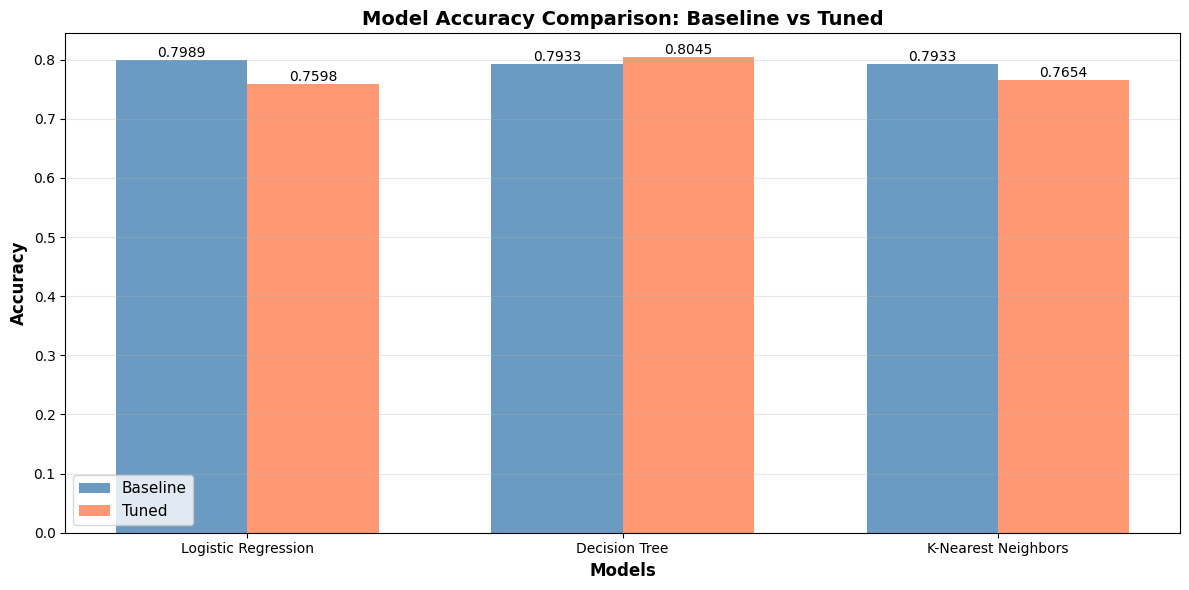

✓ Plot 1 saved


In [15]:
# Cell 9: Accuracy Comparison Plot
models = [r["model_name"] for r in baseline_results]
baseline_acc = [r["accuracy"] for r in baseline_results]
tuned_acc = [r["accuracy"] for r in tuned_results]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(
    x - width / 2, baseline_acc, width, label="Baseline", color="steelblue", alpha=0.8
)
bars2 = ax.bar(x + width / 2, tuned_acc, width, label="Tuned", color="coral", alpha=0.8)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

ax.set_xlabel("Models", fontsize=12, fontweight="bold")
ax.set_ylabel("Accuracy", fontsize=12, fontweight="bold")
ax.set_title(
    "Model Accuracy Comparison: Baseline vs Tuned", fontsize=14, fontweight="bold"
)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("logs/plots/01_accuracy_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

print("✓ Plot 1 saved")


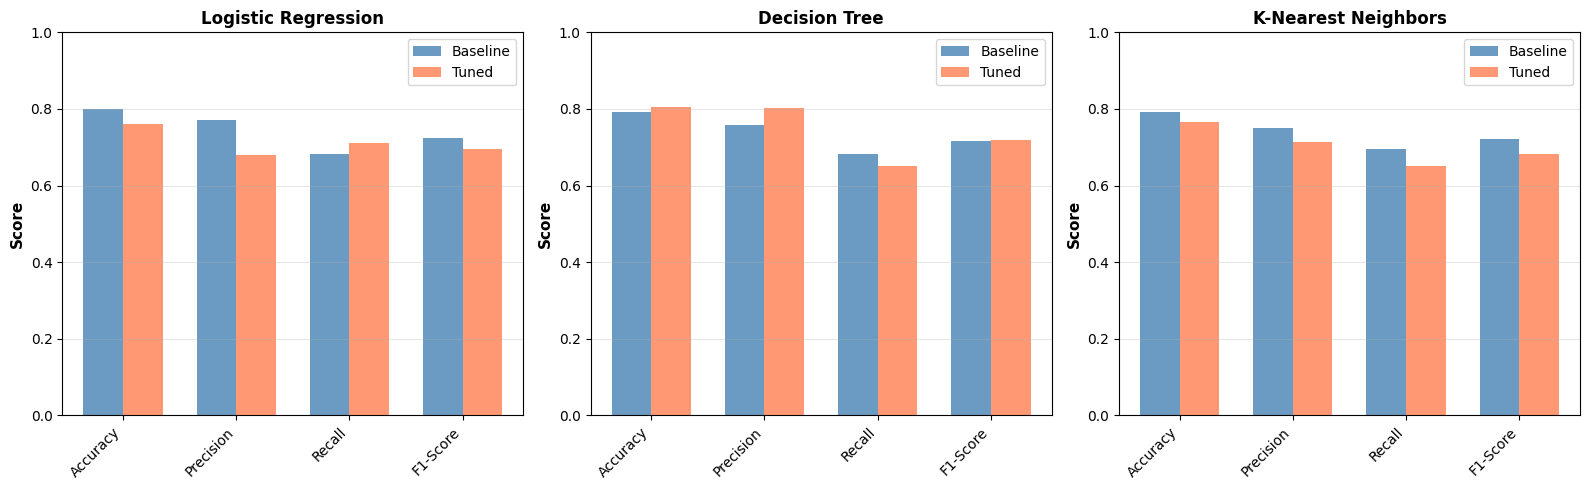

✓ Plot 2 saved


In [16]:
# Cell 10: Detailed Metrics Comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics_baseline = {
    "Accuracy": [r["accuracy"] for r in baseline_results],
    "Precision": [r["precision"] for r in baseline_results],
    "Recall": [r["recall"] for r in baseline_results],
    "F1-Score": [r["f1"] for r in baseline_results],
}

metrics_tuned = {
    "Accuracy": [r["accuracy"] for r in tuned_results],
    "Precision": [r["precision"] for r in tuned_results],
    "Recall": [r["recall"] for r in tuned_results],
    "F1-Score": [r["f1"] for r in tuned_results],
}

metric_names = list(metrics_baseline.keys())

for idx, model in enumerate(models):
    ax = axes[idx]

    baseline_vals = [metrics_baseline[m][idx] for m in metric_names]
    tuned_vals = [metrics_tuned[m][idx] for m in metric_names]

    x_pos = np.arange(len(metric_names))
    width = 0.35

    bars1 = ax.bar(
        x_pos - width / 2,
        baseline_vals,
        width,
        label="Baseline",
        color="steelblue",
        alpha=0.8,
    )
    bars2 = ax.bar(
        x_pos + width / 2, tuned_vals, width, label="Tuned", color="coral", alpha=0.8
    )

    ax.set_ylabel("Score", fontsize=11, fontweight="bold")
    ax.set_title(f"{model}", fontsize=12, fontweight="bold")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(metric_names, rotation=45, ha="right")
    ax.set_ylim([0, 1])
    ax.legend(fontsize=10)
    ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(
    "logs/plots/02_detailed_metrics_comparison.png", dpi=300, bbox_inches="tight"
)
plt.show()

print("✓ Plot 2 saved")


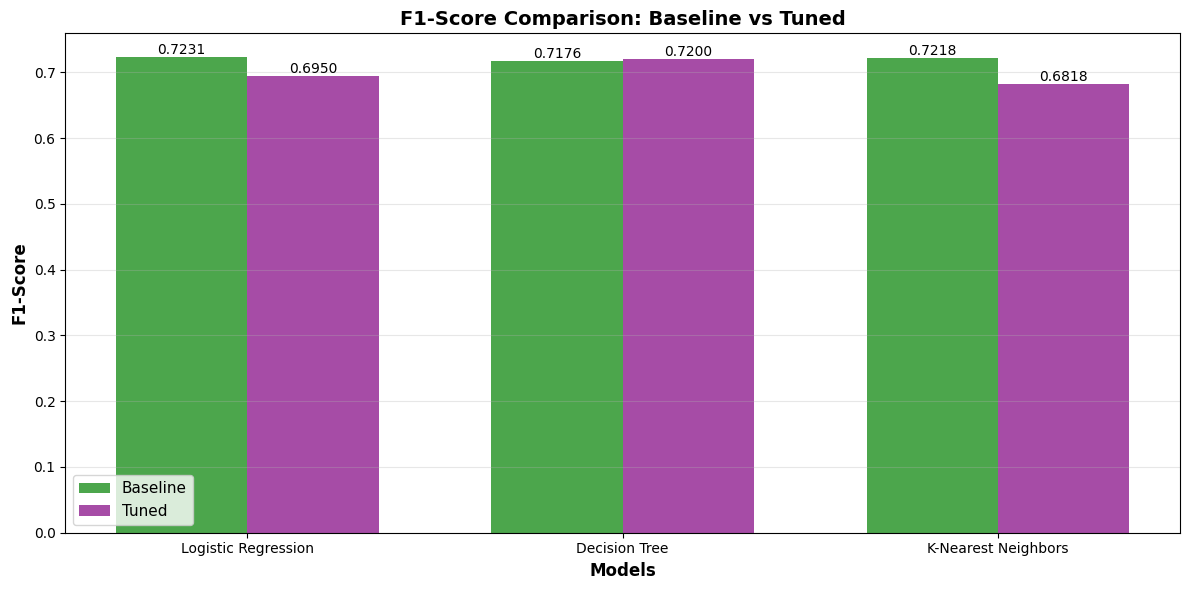

✓ Plot 3 saved


In [17]:
# Cell 11: F1-Score Comparison
baseline_f1 = [r["f1"] for r in baseline_results]
tuned_f1 = [r["f1"] for r in tuned_results]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(
    x - width / 2, baseline_f1, width, label="Baseline", color="green", alpha=0.7
)
bars2 = ax.bar(x + width / 2, tuned_f1, width, label="Tuned", color="purple", alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

ax.set_xlabel("Models", fontsize=12, fontweight="bold")
ax.set_ylabel("F1-Score", fontsize=12, fontweight="bold")
ax.set_title("F1-Score Comparison: Baseline vs Tuned", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("logs/plots/03_f1_score_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

print("✓ Plot 3 saved")


## Summary


In [18]:
# Cell 12: Final Summary
print("\n" + "=" * 70)
print("PIPELINE EXECUTION COMPLETED SUCCESSFULLY")
print("=" * 70)

print("\n📊 Output Files:")
print("\nLogs:")
print("  ✓ logs/training_log.txt")
print("  ✓ logs/tuning_log.txt")
print("  ✓ logs/training_summary.csv")
print("  ✓ logs/tuning_summary.csv")
print("  ✓ logs/comprehensive_results.csv")

print("\nVisualizations:")
print("  ✓ logs/plots/01_accuracy_comparison.png")
print("  ✓ logs/plots/02_detailed_metrics_comparison.png")
print("  ✓ logs/plots/03_f1_score_comparison.png")

print("\n📈 Results Summary:")
best_baseline = max(baseline_results, key=lambda x: x["f1"])
best_tuned = max(tuned_results, key=lambda x: x["f1"])

print(f"\nBest Baseline: {best_baseline['model_name']} (F1={best_baseline['f1']:.4f})")
print(f"Best Tuned: {best_tuned['model_name']} (F1={best_tuned['f1']:.4f})")

print("\nImprovement by Model:")
for baseline, tuned in zip(baseline_results, tuned_results):
    acc_improve = (tuned["accuracy"] - baseline["accuracy"]) * 100
    f1_improve = (tuned["f1"] - baseline["f1"]) * 100
    print(f"\n{baseline['model_name']}:")
    print(f"  Accuracy: {acc_improve:+.2f}%")
    print(f"  F1-Score: {f1_improve:+.2f}%")

print("\n" + "=" * 70)



PIPELINE EXECUTION COMPLETED SUCCESSFULLY

📊 Output Files:

Logs:
  ✓ logs/training_log.txt
  ✓ logs/tuning_log.txt
  ✓ logs/training_summary.csv
  ✓ logs/tuning_summary.csv
  ✓ logs/comprehensive_results.csv

Visualizations:
  ✓ logs/plots/01_accuracy_comparison.png
  ✓ logs/plots/02_detailed_metrics_comparison.png
  ✓ logs/plots/03_f1_score_comparison.png

📈 Results Summary:

Best Baseline: Logistic Regression (F1=0.7231)
Best Tuned: Decision Tree (F1=0.7200)

Improvement by Model:

Logistic Regression:
  Accuracy: -3.91%
  F1-Score: -2.80%

Decision Tree:
  Accuracy: +1.12%
  F1-Score: +0.24%

K-Nearest Neighbors:
  Accuracy: -2.79%
  F1-Score: -4.00%



# Titanic Survival Prediction - Complete ML Pipeline

## Overview

This notebook implements a comprehensive machine learning pipeline for Titanic survival prediction with:

- **3 Models:** Logistic Regression, Decision Tree, K-Nearest Neighbors
- **Baseline Training:** With detailed logging
- **Hyperparameter Tuning:** Using GridSearchCV
- **Comprehensive Logging:** Training and tuning logs
- **Visualization:** Before/after comparison charts

## Output Structure

```
logs/
├── training_log.txt              # Baseline training logs
├── training_summary.csv          # Baseline metrics summary
├── tuning_log.txt                # Hyperparameter tuning logs
├── tuning_summary.csv            # Tuning results summary
├── comprehensive_results.csv     # All results in one table
└── plots/
    ├── 01_accuracy_comparison.png
    ├── 02_detailed_metrics_comparison.png
    └── 03_f1_score_comparison.png
```


In [19]:
# Cell 1: Import modules and setup
import sys
import os

# Add src to path
sys.path.insert(0, "src")

from data_preprocessing import load_data, prepare_data, get_data_info
from train_models import train_all_models, save_results_summary
from tune_models import tune_all_models, save_tuning_summary
from visualize_results import plot_model_comparison, create_results_summary_table

print("All modules imported successfully!")


All modules imported successfully!


## Step 1: Data Loading & Preparation


In [20]:
# Cell 2: Load and prepare data
print("Loading data from EDA folder...")
df_train, df_test = load_data(eda_folder="../EDA")

print(f"\nDataset Information:")
info = get_data_info(df_train)
for key, value in info.items():
    print(f"  {key}: {value}")

print("\nPreparing data (train/validation split, scaling)...")
X_train, X_val, X_test, y_train, y_val, scaler = prepare_data(
    df_train, df_test, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"X_test shape:  {X_test.shape}")


Loading data from EDA folder...

Dataset Information:
  train_shape: (891, 19)
  num_features: 18
  num_samples: 891
  target_distribution: {0: np.int64(549), 1: np.int64(342)}
  missing_values: {'Pclass': np.int64(0), 'Age': np.int64(0), 'SibSp': np.int64(0), 'Parch': np.int64(0), 'Fare': np.int64(0), 'HasCabin': np.int64(0), 'Sex_male': np.int64(0), 'Embarked_Q': np.int64(0), 'Embarked_S': np.int64(0), 'Deck_B': np.int64(0), 'Deck_C': np.int64(0), 'Deck_D': np.int64(0), 'Deck_E': np.int64(0), 'Deck_F': np.int64(0), 'Deck_G': np.int64(0), 'Deck_T': np.int64(0), 'Deck_U': np.int64(0), 'missingindicator_Age': np.int64(0), 'Survived': np.int64(0)}

Preparing data (train/validation split, scaling)...
X_train shape: (712, 18)
X_val shape:   (179, 18)
X_test shape:  (418, 18)


## Step 2: Baseline Model Training (with detailed logging)


In [21]:
# Cell 3: Train baseline models
print("\nTraining baseline models...\n")
baseline_results, train_logger = train_all_models(
    X_train, X_val, y_train, y_val, log_file="logs/training_log.txt"
)

# Save baseline results summary
df_baseline_summary = save_results_summary(
    baseline_results, output_file="logs/training_summary.csv"
)

print("\nBaseline Results Summary:")
print(df_baseline_summary.to_string())


2025-10-29 07:18:45 - INFO - 
############################################################
2025-10-29 07:18:45 - INFO - 
############################################################
2025-10-29 07:18:45 - INFO - TITANIC SURVIVAL PREDICTION - MODEL TRAINING
2025-10-29 07:18:45 - INFO - TITANIC SURVIVAL PREDICTION - MODEL TRAINING
2025-10-29 07:18:45 - INFO - ############################################################
2025-10-29 07:18:45 - INFO - ############################################################
2025-10-29 07:18:45 - INFO - Start time: 2025-10-29T07:18:45.885234
2025-10-29 07:18:45 - INFO - Start time: 2025-10-29T07:18:45.885234
2025-10-29 07:18:45 - INFO - Train set size: (712, 18)
2025-10-29 07:18:45 - INFO - Train set size: (712, 18)
2025-10-29 07:18:45 - INFO - Validation set size: (179, 18)
2025-10-29 07:18:45 - INFO - Validation set size: (179, 18)
2025-10-29 07:18:45 - INFO - 
2025-10-29 07:18:45 - INFO - 
2025-10-29 07:18:45 - INFO - Training: Logistic Regression
2025-


Training baseline models...


Baseline Results Summary:
                       Model     Stage  Accuracy  Precision    Recall  F1-Score  Train Time (s)
0        Logistic Regression  baseline  0.798883   0.770492  0.681159  0.723077        0.005610
1              Decision Tree  baseline  0.793296   0.758065  0.681159  0.717557        0.003272
2  K-Nearest Neighbors (KNN)  baseline  0.793296   0.750000  0.695652  0.721805        0.002399


## Step 3: Hyperparameter Tuning (with detailed logging)


In [22]:
# Cell 4: Tune models
print("\nTuning models with GridSearchCV...\n")
tuned_results, tune_logger = tune_all_models(
    X_train, X_val, y_train, y_val, log_file="logs/tuning_log.txt"
)

# Save tuning results summary
df_tuning_summary = save_tuning_summary(
    tuned_results, output_file="logs/tuning_summary.csv"
)

print("\nTuning Results Summary:")
print(df_tuning_summary.to_string())


2025-10-29 07:18:45 - INFO - 
############################################################
2025-10-29 07:18:45 - INFO - HYPERPARAMETER TUNING PHASE
2025-10-29 07:18:45 - INFO - ############################################################
2025-10-29 07:18:45 - INFO - Start time: 2025-10-29T07:18:45.987334

2025-10-29 07:18:45 - INFO - 
2025-10-29 07:18:45 - INFO - Tuning: Logistic Regression
2025-10-29 07:18:45 - INFO - ============================================================
2025-10-29 07:18:45 - INFO - HYPERPARAMETER TUNING PHASE
2025-10-29 07:18:45 - INFO - ############################################################
2025-10-29 07:18:45 - INFO - Start time: 2025-10-29T07:18:45.987334

2025-10-29 07:18:45 - INFO - 
2025-10-29 07:18:45 - INFO - Tuning: Logistic Regression
2025-10-29 07:18:45 - INFO - ============================================================



Tuning models with GridSearchCV...

Fitting 5 folds for each of 24 candidates, totalling 120 fits


2025-10-29 07:18:46 - INFO - Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
2025-10-29 07:18:46 - INFO - Best CV F1-Score: 0.7435
2025-10-29 07:18:46 - INFO - Validation Metrics (Tuned):
2025-10-29 07:18:46 - INFO -   Accuracy:  0.7598
2025-10-29 07:18:46 - INFO -   Precision: 0.6806
2025-10-29 07:18:46 - INFO -   Recall:    0.7101
2025-10-29 07:18:46 - INFO -   F1-Score:  0.6950
2025-10-29 07:18:46 - INFO - Tuning time: 0.0840s

2025-10-29 07:18:46 - INFO - 
2025-10-29 07:18:46 - INFO - Tuning: Decision Tree
2025-10-29 07:18:46 - INFO - ============================================================
2025-10-29 07:18:46 - INFO - Best CV F1-Score: 0.7435
2025-10-29 07:18:46 - INFO - Validation Metrics (Tuned):
2025-10-29 07:18:46 - INFO -   Accuracy:  0.7598
2025-10-29 07:18:46 - INFO -   Precision: 0.6806
2025-10-29 07:18:46 - INFO -   Recall:    0.7101
2025-10-29 07:18:46 - INFO -   F1-Score:  0.6950
2025-10-29 07:18:46 - INFO - Tuning time: 0.0840

Fitting 5 folds for each of 90 candidates, totalling 450 fits


2025-10-29 07:18:46 - INFO - Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
2025-10-29 07:18:46 - INFO - Best CV F1-Score: 0.7545
2025-10-29 07:18:46 - INFO - Validation Metrics (Tuned):
2025-10-29 07:18:46 - INFO -   Accuracy:  0.8045
2025-10-29 07:18:46 - INFO -   Precision: 0.8036
2025-10-29 07:18:46 - INFO -   Recall:    0.6522
2025-10-29 07:18:46 - INFO -   F1-Score:  0.7200
2025-10-29 07:18:46 - INFO - Tuning time: 0.2275s

2025-10-29 07:18:46 - INFO - 
2025-10-29 07:18:46 - INFO - Tuning: K-Nearest Neighbors
2025-10-29 07:18:46 - INFO - ============================================================
2025-10-29 07:18:46 - INFO - Best CV F1-Score: 0.7545
2025-10-29 07:18:46 - INFO - Validation Metrics (Tuned):
2025-10-29 07:18:46 - INFO -   Accuracy:  0.8045
2025-10-29 07:18:46 - INFO -   Precision: 0.8036
2025-10-29 07:18:46 - INFO -   Recall:    0.6522
2025-10-29 07:18:46 - INFO -   F1-Score:  0.7200
2025-10-29 07:18:46 - INFO 

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Tuning Results Summary:
                 Model  Best CV F1-Score  Val Accuracy  Val Precision  Val Recall  Val F1-Score  Tuning Time (s)
0  Logistic Regression          0.743468      0.759777       0.680556    0.710145      0.695035         0.084026
1        Decision Tree          0.754469      0.804469       0.803571    0.652174      0.720000         0.227512
2  K-Nearest Neighbors          0.746911      0.765363       0.714286    0.652174      0.681818         0.079453


## Step 4: Create Comprehensive Results Summary


In [23]:
# Cell 5: Create comprehensive results table
df_comprehensive = create_results_summary_table(
    baseline_results, tuned_results, output_file="logs/comprehensive_results.csv"
)

print("\nComprehensive Results (Baseline vs Tuned):")
print(df_comprehensive.to_string(index=False))



Comprehensive Results (Baseline vs Tuned):
                    Model    Stage  Accuracy  Precision   Recall  F1-Score
      Logistic Regression Baseline  0.798883   0.770492 0.681159  0.723077
      Logistic Regression    Tuned  0.759777   0.680556 0.710145  0.695035
            Decision Tree Baseline  0.793296   0.758065 0.681159  0.717557
            Decision Tree    Tuned  0.804469   0.803571 0.652174  0.720000
K-Nearest Neighbors (KNN) Baseline  0.793296   0.750000 0.695652  0.721805
      K-Nearest Neighbors    Tuned  0.765363   0.714286 0.652174  0.681818


## Step 5: Visualization & Comparison


In [24]:
# Cell 6: Generate comparison plots
print("\nGenerating comparison plots...")
plot_model_comparison(baseline_results, tuned_results, output_dir="logs/plots")
print("Plots saved successfully!")



Generating comparison plots...
Plots saved to logs/plots/
Plots saved successfully!
Plots saved to logs/plots/
Plots saved successfully!


## Summary

Pipeline execution complete! Here's what was generated:

### Log Files:

1. **logs/training_log.txt** - Detailed baseline training log with metrics and confusion matrices
2. **logs/tuning_log.txt** - Detailed hyperparameter tuning log
3. **logs/training_summary.csv** - Baseline results in CSV format
4. **logs/tuning_summary.csv** - Tuning results in CSV format
5. **logs/comprehensive_results.csv** - All results combined

### Visualizations:

1. **logs/plots/01_accuracy_comparison.png** - Accuracy before/after tuning
2. **logs/plots/02_detailed_metrics_comparison.png** - All metrics for each model
3. **logs/plots/03_f1_score_comparison.png** - F1-score comparison

All files are ready for review and analysis!
